In [1]:
import sys
sys.path.append('/explore/nobackup/people/gtamkin/dev/AGB/mpf-model-factories/MultiPathFusion')
from multi_path_fusion.src.utils.data_generator_helpers import load_data_generator

2023-10-28 12:32:02.000731: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-28 12:32:03.449573: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow import keras
from multi_path_fusion.src.utils.data_generator_helpers import load_data_generator
import json
import matplotlib.pyplot as plt
import numpy as np
import mlflow
import rasterio

In [3]:
with open('../../config/config_full_hyperspectral_gt.json', 'r') as f:
    config = json.load(f)
    models_config = config["models"]
    data_generator_config = config["data_generator"]
    mlflow_config = config["mlflow"]

In [4]:
data_path = os.path.abspath('/explore/nobackup/projects/ilab/data/AGB/test/beta_pmm')


In [7]:
filepath = data_path + '/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif'
print (filepath)

/explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif


In [8]:
def get_image_shape(filepath):
    with rasterio.open(filepath) as src:
        return (src.count,) + src.shape
print(get_image_shape(filepath))

(426, 1000, 1000)


In [9]:
def load_image(filepath):
    img = rasterio.open(filepath)
    return img

In [10]:
img = load_image(filepath)

In [11]:
def plot_image(img, band):
    plt.imshow(img.read(band), cmap='pink')

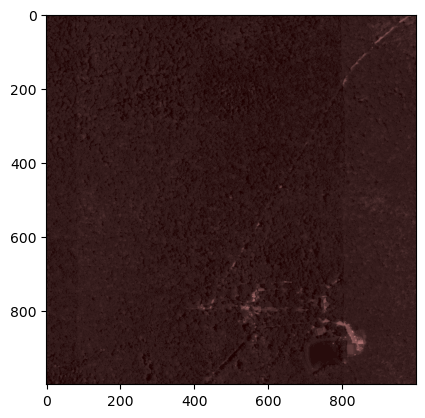

In [12]:
plot_image(img, 56)

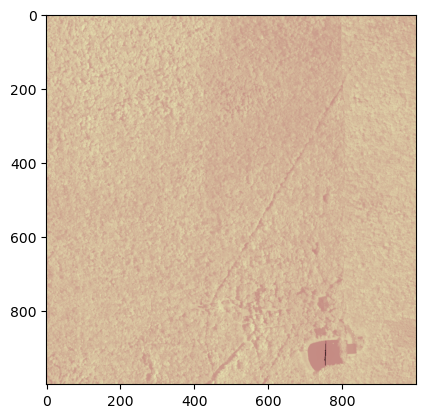

In [15]:
plot_image(img, 133)

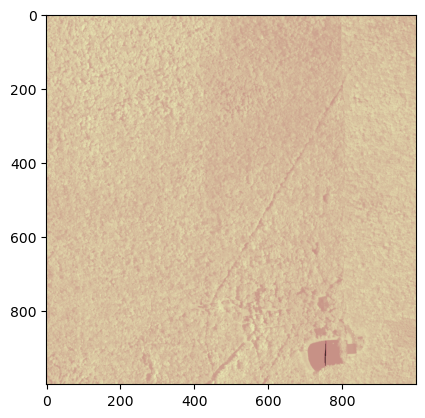

In [13]:
plot_image(img, 134)

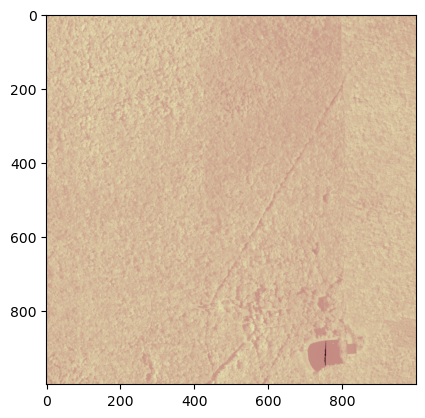

In [14]:
plot_image(img, 135)

In [17]:
!/panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/ilab-tensorflow/bin/gdalinfo -mm -stats -hist $filepath

Driver: GTiff/GeoTIFF
Files: /explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif
Size is 1000, 1000
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 17N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 17N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-81,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EP